# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [87]:
import pandas as pd

In [88]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [90]:
# Convert flight_day to numeric values
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

# Verify the data type conversion
print(df["flight_day"].dtypes)


int64


In [91]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [92]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [93]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [94]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0


In [95]:
df_cat = df.select_dtypes(include='object')
df_cat

,sales_channel,trip_type,route,booking_origin
0,Internet,RoundTrip,AKLDEL,New Zealand
1,Internet,RoundTrip,AKLDEL,New Zealand
2,Internet,RoundTrip,AKLDEL,India
3,Internet,RoundTrip,AKLDEL,New Zealand
4,Internet,RoundTrip,AKLDEL,India
...,...,...,...,...
49995,Internet,RoundTrip,PERPNH,Australia
49996,Internet,RoundTrip,PERPNH,Australia
49997,Internet,RoundTrip,PERPNH,Australia
49998,Internet,RoundTrip,PERPNH,Australia


In [96]:
df['trip_type'].value_counts()

RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64

In [97]:
df['sales_channel'].value_counts()

Internet    44382
Mobile       5618
Name: sales_channel, dtype: int64

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

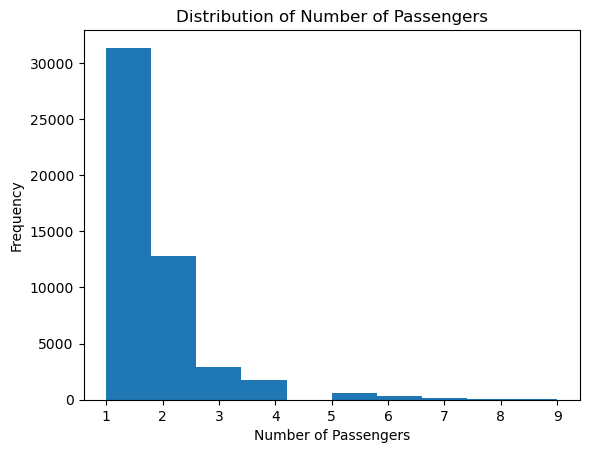

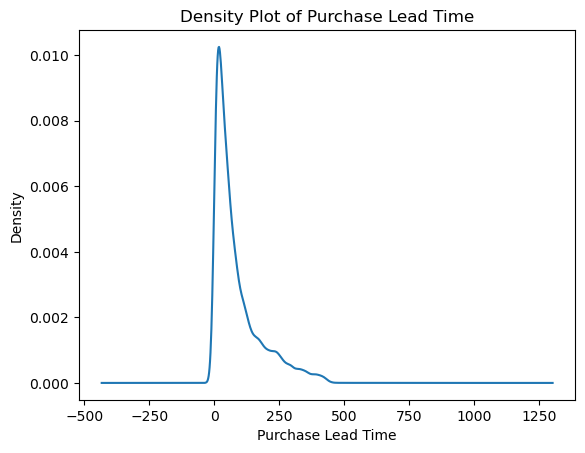

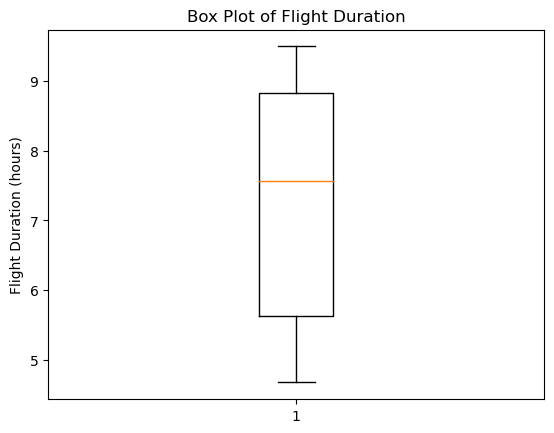

In [99]:
import matplotlib.pyplot as plt

# Histogram of num_passengers
plt.hist(df['num_passengers'], bins=10)
plt.xlabel('Number of Passengers')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Passengers')
plt.show()

# Density plot of purchase_lead
plt.figure()
df['purchase_lead'].plot(kind='density')
plt.xlabel('Purchase Lead Time')
plt.ylabel('Density')
plt.title('Density Plot of Purchase Lead Time')
plt.show()

# Box plot of flight_duration
plt.figure()
plt.boxplot(df['flight_duration'])
plt.ylabel('Flight Duration (hours)')
plt.title('Box Plot of Flight Duration')
plt.show()


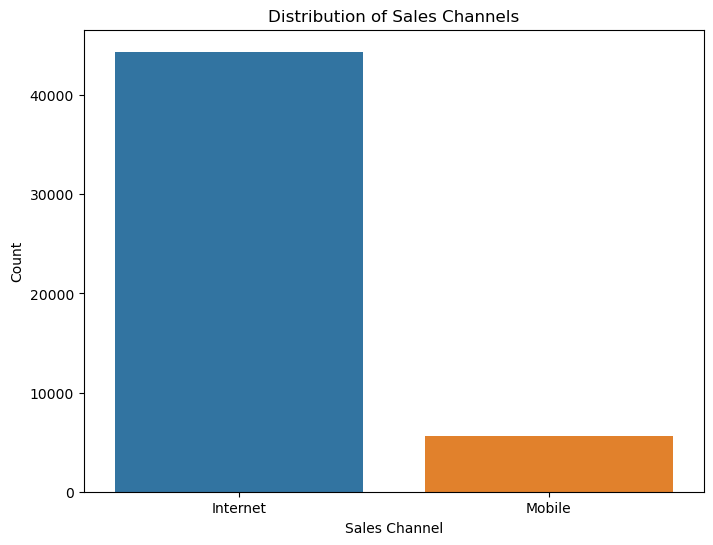

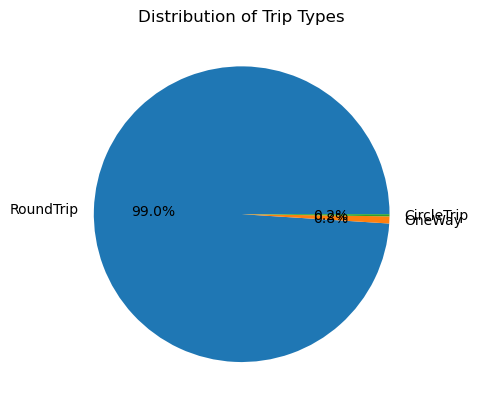

In [100]:
import seaborn as sns

# Bar plot of sales_channel
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sales_channel')
plt.xlabel('Sales Channel')
plt.ylabel('Count')
plt.title('Distribution of Sales Channels')
plt.show()

# Pie chart of trip_type
plt.figure()
df['trip_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('Distribution of Trip Types')
plt.show()


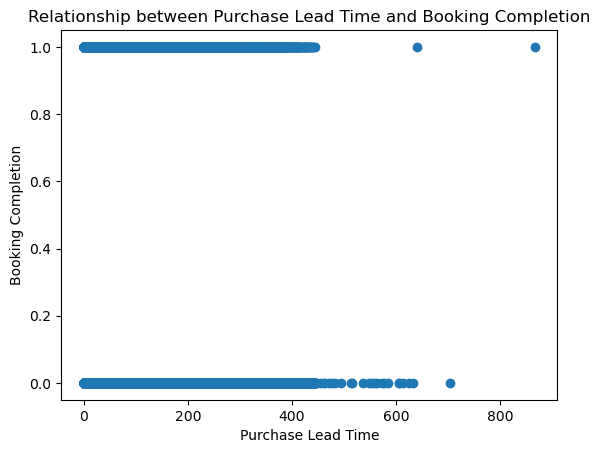

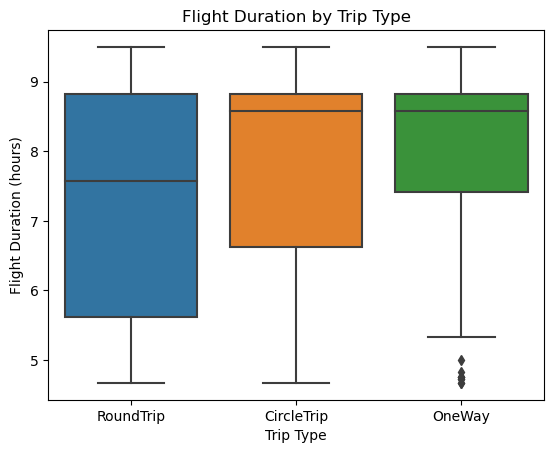

In [101]:
# Scatter plot of purchase_lead and booking_complete
plt.figure()
plt.scatter(df['purchase_lead'], df['booking_complete'])
plt.xlabel('Purchase Lead Time')
plt.ylabel('Booking Completion')
plt.title('Relationship between Purchase Lead Time and Booking Completion')
plt.show()

# Box plot of flight_duration by trip_type
plt.figure()
sns.boxplot(data=df, x='trip_type', y='flight_duration')
plt.xlabel('Trip Type')
plt.ylabel('Flight Duration (hours)')
plt.title('Flight Duration by Trip Type')
plt.show()


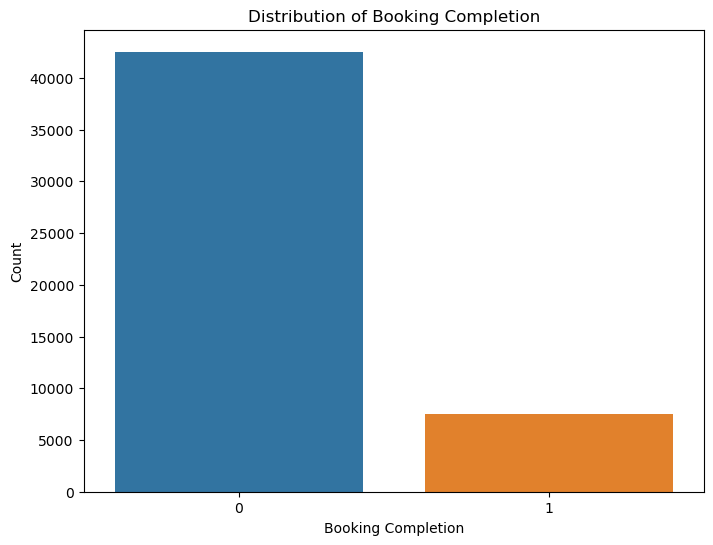

Proportion of Completed Bookings:
 0    85.044
1    14.956
Name: booking_complete, dtype: float64


In [102]:
# Bar plot of booking_complete
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='booking_complete')
plt.xlabel('Booking Completion')
plt.ylabel('Count')
plt.title('Distribution of Booking Completion')
plt.show()

# Proportion of completed bookings
completed_bookings = df['booking_complete'].value_counts(normalize=True) * 100
print('Proportion of Completed Bookings:\n', completed_bookings)


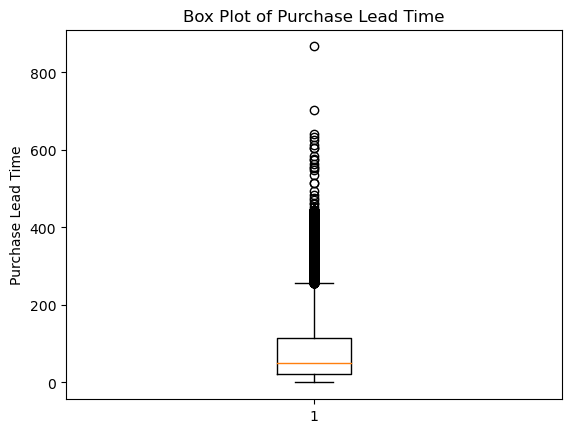

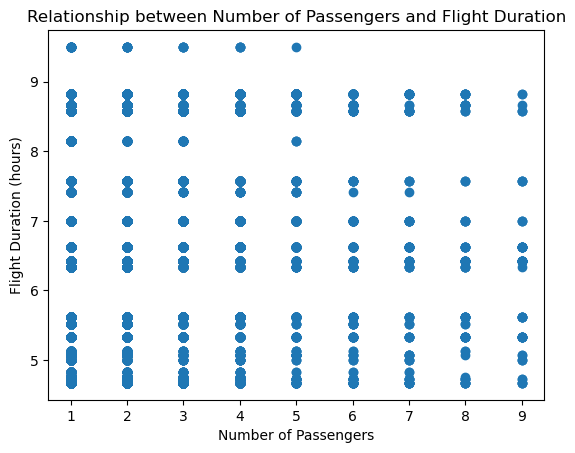

In [103]:
# Box plot of purchase_lead
plt.figure()
plt.boxplot(df['purchase_lead'])
plt.ylabel('Purchase Lead Time')
plt.title('Box Plot of Purchase Lead Time')
plt.show()

# Scatter plot of num_passengers and flight_duration
plt.figure()
plt.scatter(df['num_passengers'], df['flight_duration'])
plt.xlabel('Number of Passengers')
plt.ylabel('Flight Duration (hours)')
plt.title('Relationship between Number of Passengers and Flight Duration')
plt.show()


In [104]:
from scipy.stats import chi2_contingency

# Chi-square test for association between sales_channel and booking_complete
crosstab = pd.crosstab(df['sales_channel'], df['booking_complete'])
chi2, p, dof, expected = chi2_contingency(crosstab)
print('Chi-square test results:')
print('Chi-square statistic:', chi2)
print('p-value:', p)


Chi-square test results:
Chi-square statistic: 83.93114914857576
p-value: 5.1230944214045184e-20


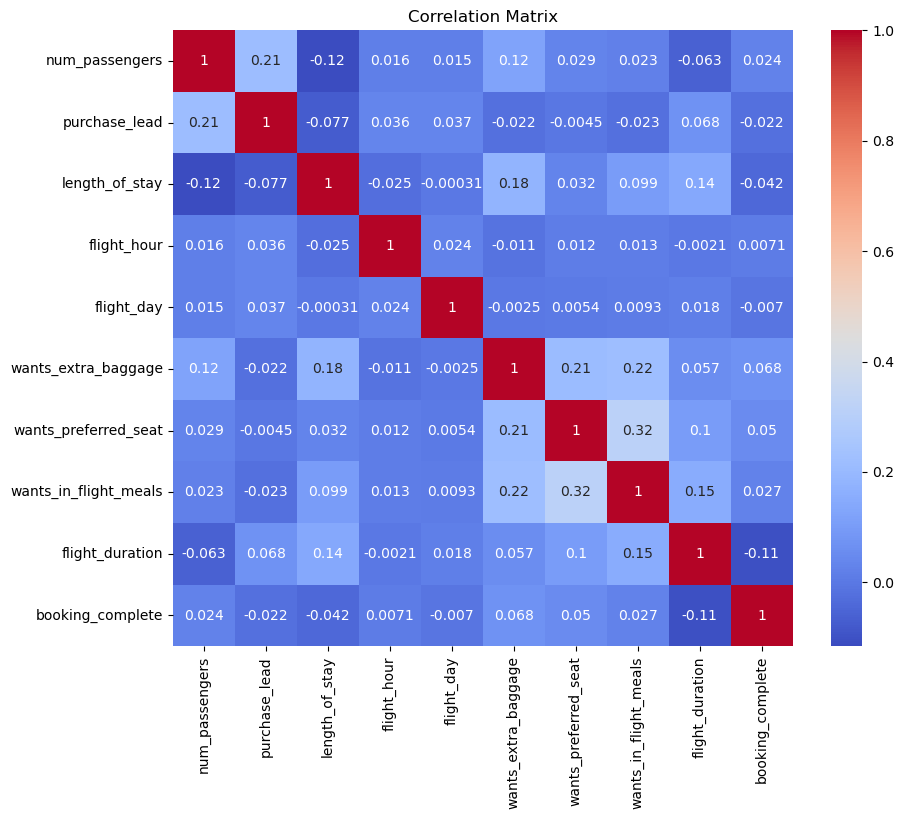

In [105]:
# Compute correlation matrix
corr_matrix = df.corr()

# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [106]:
numeric_columns = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']

statistics = df[numeric_columns].describe().loc[['mean', '50%', 'min', 'max', 'std']]
print('Basic Statistics for Numeric Variables:')
print(statistics)


Basic Statistics for Numeric Variables:
      num_passengers  purchase_lead  length_of_stay  flight_hour  \
mean        1.591240      84.940480        23.04456      9.06634   
50%         1.000000      51.000000        17.00000      9.00000   
min         1.000000       0.000000         0.00000      0.00000   
max         9.000000     867.000000       778.00000     23.00000   
std         1.020165      90.451378        33.88767      5.41266   

      flight_duration  
mean         7.277561  
50%          7.570000  
min          4.670000  
max          9.500000  
std          1.496863  


In [107]:
categorical_columns = ['sales_channel', 'trip_type', 'route', 'booking_origin']

mode_values = df[categorical_columns].mode().loc[0]
print('Mode for Categorical Variables:')
print(mode_values)


Mode for Categorical Variables:
sales_channel      Internet
trip_type         RoundTrip
route                AKLKUL
booking_origin    Australia
Name: 0, dtype: object


In [108]:
completion_by_category = df.groupby('sales_channel')['booking_complete'].mean()
print('Proportion of Booking Completion by Sales Channel:')
print(completion_by_category)


Proportion of Booking Completion by Sales Channel:
sales_channel
Internet    0.154770
Mobile      0.108402
Name: booking_complete, dtype: float64


In [109]:
correlation_matrix = df[numeric_columns].corr()
correlation_values = correlation_matrix.unstack().sort_values(ascending=False)
print('Correlation Coefficients between Numeric Variables:')
print(correlation_values)


Correlation Coefficients between Numeric Variables:
num_passengers   num_passengers     1.000000
purchase_lead    purchase_lead      1.000000
flight_hour      flight_hour        1.000000
length_of_stay   length_of_stay     1.000000
flight_duration  flight_duration    1.000000
num_passengers   purchase_lead      0.212606
purchase_lead    num_passengers     0.212606
flight_duration  length_of_stay     0.141181
length_of_stay   flight_duration    0.141181
purchase_lead    flight_duration    0.067866
flight_duration  purchase_lead      0.067866
purchase_lead    flight_hour        0.035973
flight_hour      purchase_lead      0.035973
                 num_passengers     0.015607
num_passengers   flight_hour        0.015607
flight_hour      flight_duration   -0.002101
flight_duration  flight_hour       -0.002101
length_of_stay   flight_hour       -0.024872
flight_hour      length_of_stay    -0.024872
flight_duration  num_passengers    -0.063169
num_passengers   flight_duration   -0.063169
len

In [110]:
categorical_columns = ['sales_channel', 'trip_type', 'route', 'booking_origin']

for column in categorical_columns:
    count = df[column].value_counts()
    percentage = df[column].value_counts(normalize=True) * 100
    print(f'Category Counts for {column}:')
    print(count)
    print(f'\nCategory Percentages for {column}:')
    print(percentage)
    print('-----------------------------')


Category Counts for sales_channel:
Internet    44382
Mobile       5618
Name: sales_channel, dtype: int64

Category Percentages for sales_channel:
Internet    88.764
Mobile      11.236
Name: sales_channel, dtype: float64
-----------------------------
Category Counts for trip_type:
RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64

Category Percentages for trip_type:
RoundTrip     98.994
OneWay         0.774
CircleTrip     0.232
Name: trip_type, dtype: float64
-----------------------------
Category Counts for route:
AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
LBUTPE       1
CXRMEL       1
DELKBR       1
KOSSYD       1
MRUXIY       1
Name: route, Length: 799, dtype: int64

Category Percentages for route:
AKLKUL    5.360
PENTPE    1.848
MELSGN    1.684
ICNSIN    1.602
DMKKIX    1.488
          ...  
LBUTPE    0.002
CXRMEL    0.002
DELKBR    0.002
KOSSYD    0.002
MRUXIY    0.002
Name: route, Length: 799, d

In [111]:
numeric_columns = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']

skewness = df[numeric_columns].skew()
kurtosis = df[numeric_columns].kurtosis()

print('Skewness of Numeric Variables:')
print(skewness)
print('\nKurtosis of Numeric Variables:')
print(kurtosis)


Skewness of Numeric Variables:
num_passengers     2.690908
purchase_lead      1.653035
length_of_stay     5.274743
flight_hour        0.396623
flight_duration   -0.360080
dtype: float64

Kurtosis of Numeric Variables:
num_passengers     10.062131
purchase_lead       2.486702
length_of_stay     48.810238
flight_hour        -0.302438
flight_duration    -1.373927
dtype: float64


In [112]:
categorical_columns = ['sales_channel', 'trip_type', 'route', 'booking_origin']

for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 != col2:
            crosstab = pd.crosstab(df[col1], df[col2])
            print(f'Cross-tabulation between {col1} and {col2}:')
            print(crosstab)
            print('-----------------------------')


Cross-tabulation between sales_channel and trip_type:
trip_type      CircleTrip  OneWay  RoundTrip
sales_channel                               
Internet              112     369      43901
Mobile                  4      18       5596
-----------------------------
Cross-tabulation between sales_channel and route:
route          AKLDEL  AKLHGH  AKLHND  AKLICN  AKLKIX  AKLKTM  AKLKUL  AKLMRU  \
sales_channel                                                                   
Internet           19       1       2      67       8       6    2438       6   
Mobile              1       0       0       3       0       1     242       0   

route          AKLPEK  AKLPVG  ...  TGGXIY  TPETRZ  TPETWU  TPEURT  TPEVTE  \
sales_channel                  ...                                           
Internet            4       3  ...       2      24       6       1       2   
Mobile              1       0  ...       0       1       0       0       0   

route          TRZWUH  TRZXIY  TWUWUH  TWUXIY  U

Cross-tabulation between booking_origin and route:
route                 AKLDEL  AKLHGH  AKLHND  AKLICN  AKLKIX  AKLKTM  AKLKUL  \
booking_origin                                                                 
(not set)                  0       0       0       0       0       0       4   
Afghanistan                0       0       0       0       0       0       0   
Algeria                    0       0       0       0       0       0       0   
Argentina                  0       0       0       0       0       0       0   
Australia                  0       0       0       0       0       0      18   
...                      ...     ...     ...     ...     ...     ...     ...   
United Arab Emirates       0       0       0       0       0       0       4   
United Kingdom             1       0       0       0       0       0      31   
United States              0       0       0       0       0       0      17   
Vanuatu                    0       0       0       0       0       0 

In [113]:
categorical_column = 'sales_channel'
numeric_columns = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']

grouped_mean = df.groupby(categorical_column)[numeric_columns].mean()
grouped_std = df.groupby(categorical_column)[numeric_columns].std()

print(f'Mean of Numeric Variables by {categorical_column}:')
print(grouped_mean)
print('\nStandard Deviation of Numeric Variables by {categorical_column}:')
print(grouped_std)


Mean of Numeric Variables by sales_channel:
               num_passengers  purchase_lead  length_of_stay  flight_hour  \
sales_channel                                                               
Internet             1.592132      85.371682       23.772205     9.023253   
Mobile               1.584194      81.533998       17.296191     9.406728   

               flight_duration  
sales_channel                   
Internet              7.298133  
Mobile                7.115043  

Standard Deviation of Numeric Variables by {categorical_column}:
               num_passengers  purchase_lead  length_of_stay  flight_hour  \
sales_channel                                                               
Internet             1.021267      90.560438       34.533885     5.393646   
Mobile               1.011477      89.520138       27.604242     5.549326   

               flight_duration  
sales_channel                   
Internet              1.500268  
Mobile                1.459655  


In [114]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0


In [115]:
# Extracting month and year from flight_day
df['flight_month'] = pd.to_datetime(df['flight_day']).dt.month
df['flight_year'] = pd.to_datetime(df['flight_day']).dt.year

# Creating binary indicators for customer preferences
df['has_extra_baggage'] = df['wants_extra_baggage'].map({'Yes': 1, 'No': 0})
df['has_preferred_seat'] = df['wants_preferred_seat'].map({'Yes': 1, 'No': 0})
df['has_in_flight_meals'] = df['wants_in_flight_meals'].map({'Yes': 1, 'No': 0})
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,flight_month,flight_year,has_extra_baggage,has_preferred_seat,has_in_flight_meals
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,1,1970,NaN,NaN,NaN
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,1,1970,NaN,NaN,NaN
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,1,1970,NaN,NaN,NaN
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,1,1970,NaN,NaN,NaN
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,1,1970,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0,1,1970,NaN,NaN,NaN
49996,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0,1,1970,NaN,NaN,NaN
49997,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0,1,1970,NaN,NaN,NaN
49998,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0,1,1970,NaN,NaN,NaN


In [122]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['sales_channel', 'trip_type', 'route', 'booking_origin','flight_day']

label_encoder = LabelEncoder()

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

print('Label Encoded DataFrame:')
df

Label Encoded DataFrame:


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,262,19,7,2,0,61,1,0,0,5.52,0
1,1,0,2,112,20,3,2,0,61,0,0,0,5.52,0
2,2,0,2,243,22,17,6,0,36,1,1,0,5.52,0
3,1,0,2,96,31,4,2,0,61,0,0,1,5.52,0
4,2,0,2,68,22,15,6,0,36,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0,2,27,6,9,2,720,4,1,0,1,5.62,0
49996,1,0,2,111,6,4,3,720,4,0,0,0,5.62,0
49997,1,0,2,24,6,22,2,720,4,0,0,1,5.62,0
49998,1,0,2,15,6,11,1,720,4,1,0,1,5.62,0


In [125]:
import pandas as pd
import statsmodels.api as sm

# Define the predictor variables (X) and the target variable (y)
X = df.drop('booking_complete', axis=1)
y = df['booking_complete']

# Add a constant column to the predictor variables
X = sm.add_constant(X)

# Fit the OLS model
ols_model = sm.OLS(y, X)
ols_results = ols_model.fit()

# Print the summary of the OLS model
ols_results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       booking_complete   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     146.8
Date:                Sat, 27 May 2023   Prob (F-statistic):               0.00
Time:                        13:50:03   Log-Likelihood:                -18459.
No. Observations:               50000   AIC:                         3.695e+04
Df Residuals:                   49986   BIC:                         3.707e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0970      0.027      3.640      0.000       0.045       0.149
num_passengers            0.0010      0.002      0.600      0.549      -0.002       0.004
sales_channel            -0.0545      0.005    -10.939      0.000      -0.064      -0.045
trip_type                 0.0676      0.012      5.596      0.000       0.044       0.091
purchase_lead         -9.896e-05   1.79e-05     -5.515      0.000      -0.000   -6.38e-05
length_of_stay           -0.0004   4.81e-05     -8.167      0.000      -0.000      -0.000
flight_hour               0.0002      0.000      0.616      0.538      -0.000       0.001
flight_day                0.0016      0.001      2.043      0.041    6.44e-05       0.003
route                 -2.885e-05   7.04e-06     -4.101      0.000   -4.26e-05   -1.51e-05
booking_origin            0.0012   4.97e-05     24.849      0.000       0.001       0.001
wants_extra_baggage       0.0499      0.004     14.108      0.000       0.043       0.057
wants_preferred_seat      0.0366      0.004      9.998      0.000       0.029       0.044
wants_in_flight_meals     0.0160      0.003      4.675      0.000       0.009       0.023
flight_duration          -0.0210      0.001    -18.872      0.000      -0.023      -0.019
==============================================================================
Omnibus:                    15382.786   Durbin-Watson:                   1.816
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34535.915
Skew:                           1.850   Prob(JB):                         0.00
Kurtosis:                       4.700   Cond. No.                     8.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [124]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
# Split the data into training and testing sets
X = df.drop('booking_complete', axis=1)
y = df['booking_complete']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print('Accuracy:', accuracy)
print('Classification Report:')
print(classification_rep)


Accuracy: 0.8562
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.57      0.11      0.19      1480

    accuracy                           0.86     10000
   macro avg       0.72      0.55      0.55     10000
weighted avg       0.82      0.86      0.81     10000

